In [5]:
pip install seaborn


In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [3]:
df =  pd.read_csv('Customer Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


# Replacing blank space with 0 and convert into float

In [5]:
df["TotalCharges"] =  df["TotalCharges"].replace(" ", 0)
df["TotalCharges"] = df["TotalCharges"].astype("float")

In [6]:
df.isnull().sum().sum()

0

In [7]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [8]:
df["customerID"].duplicated().sum()


0

# Converted 0 and 1 values of senior citizen to yes/no to make it understand


In [9]:
def conv(value):
    if value == 1:
        return "yes"
    else:
        return "no"

df['SeniorCitizin'] = df['SeniorCitizen'].apply(conv)

In [10]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,SeniorCitizin
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,no
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,no
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,no
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,no
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,no


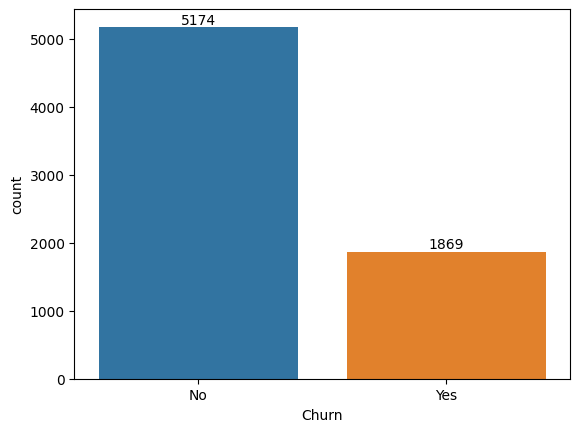

In [11]:
ax = sns.countplot(x = 'Churn', data = df)

ax.bar_label(ax.containers[0])
plt.show()

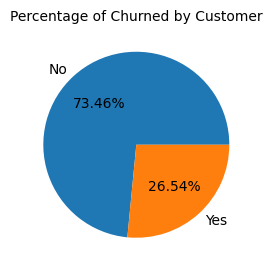

In [12]:
plt.figure(figsize = (3,4))
gb = df.groupby('Churn').agg({'Churn': "count"})
plt.pie(gb['Churn'], labels = gb.index, autopct = "%1.2f%%")
plt.title("Percentage of Churned by Customer", fontsize = 10)
plt.show()


#from the giver pie chart we can conclude that 26.54 of our cutomer chourned out
#now explore the reason behind it

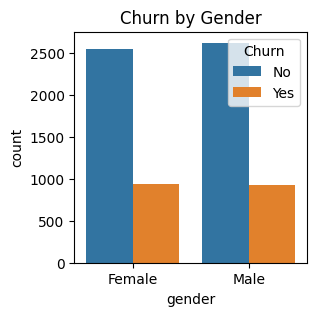

In [13]:
plt.figure(figsize = (3,3))
sns.countplot(x = "gender", data = df, hue = "Churn")
plt.title("Churn by Gender")
plt.show()

C:\Users\Kajol\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


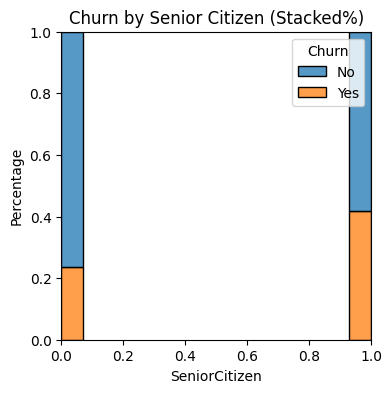

In [14]:
plt.figure(figsize = (4,4))
sns.histplot(data = df, x= "SeniorCitizen", hue="Churn", stat="percent", multiple="fill")

plt.title("Churn by Senior Citizen (Stacked%)")
plt.ylabel("Percentage")
plt.show()


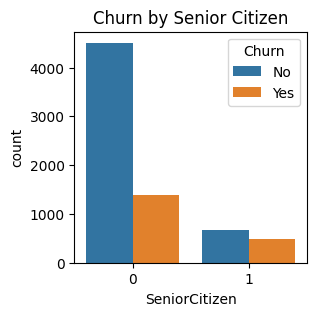

In [15]:
plt.figure(figsize = (3,3))
sns.countplot(x = "SeniorCitizen", data = df, hue = "Churn")
plt.title("Churn by Senior Citizen")
plt.show()

In [16]:
pip install --upgrade seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.12.2
    Uninstalling seaborn-0.12.2:
      Successfully uninstalled seaborn-0.12.2
Note: you may need to restart the kernel to use updated packages.


In [17]:
pip install --user seaborn

Note: you may need to restart the kernel to use updated packages.


C:\Users\Kajol\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


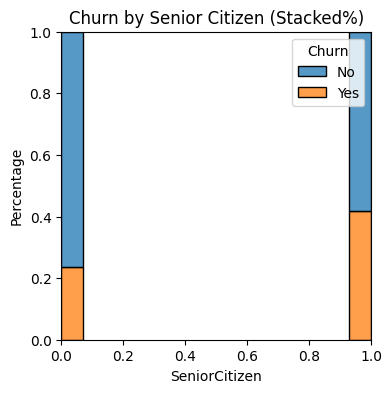

In [18]:

plt.figure(figsize = (4,4))
sns.histplot(data = df, x= "SeniorCitizen", hue="Churn", stat="percent", multiple="fill")

plt.title("Churn by Senior Citizen (Stacked%)")
plt.ylabel("Percentage")
plt.show()

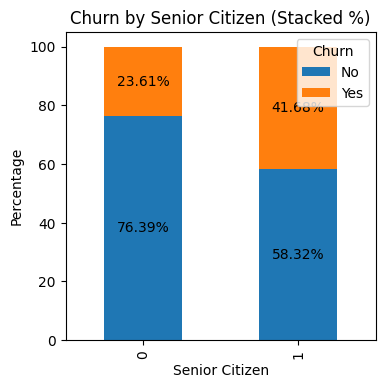

In [19]:

counts = df.groupby(["SeniorCitizen", "Churn"]).size().unstack().fillna(0)

# Convert counts to percentages
percentages = counts.div(counts.sum(axis=1), axis=0) * 100

# Plot stacked bar chart
ax = percentages.plot(kind="bar", stacked=True, figsize=(4, 4))

# Annotating the percentages on the stacked bars
for p in ax.patches:
    height = p.get_height()
    width = p.get_width()
    x = p.get_x() + width / 2
    y = p.get_y() + height / 2
    percentage = f'{height:.2f}%'  # Formatting the percentage
    ax.text(x, y, percentage, ha='center', va='center')

plt.title("Churn by Senior Citizen (Stacked %)")
plt.ylabel("Percentage")
plt.xlabel("Senior Citizen")
plt.legend(title="Churn", loc="upper right")
plt.show()


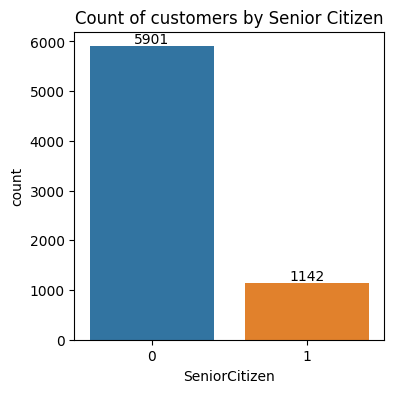

In [24]:
plt.figure(figsize = (4, 4))
ax = sns.countplot(x = "SeniorCitizen", data = df)
ax.bar_label(ax.containers[0])
plt.title("Count of customers by Senior Citizen")
plt.show()

#Comparative a greater percentage of people in senior citizen category have churned

C:\Users\Kajol\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


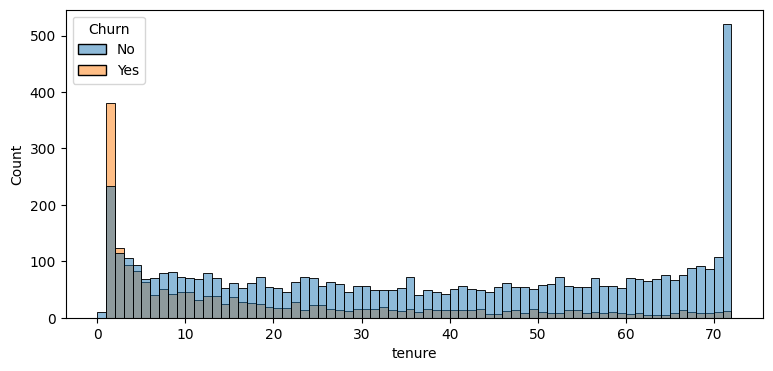

In [31]:
plt.figure(figsize = (9,4))
sns.histplot(x = "tenure", data = df, bins = 72, hue = "Churn")
plt.show()

# People who have used our services for a long time have stayed and people who have used for 1 or 2 months have churned

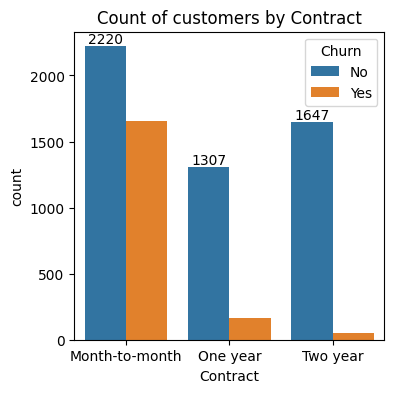

In [36]:
plt.figure(figsize = (4, 4))
ax = sns.countplot(x = "Contract", data = df, hue = "Churn")
ax.bar_label(ax.containers[0])
plt.title("Count of customers by Contract")
plt.show()

In [37]:
#People whi have month to month contract are likely to churn then from those who have 1 or 2 years of contract 

In [38]:
df.columns.values


array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn', 'SeniorCitizin'], dtype=object)

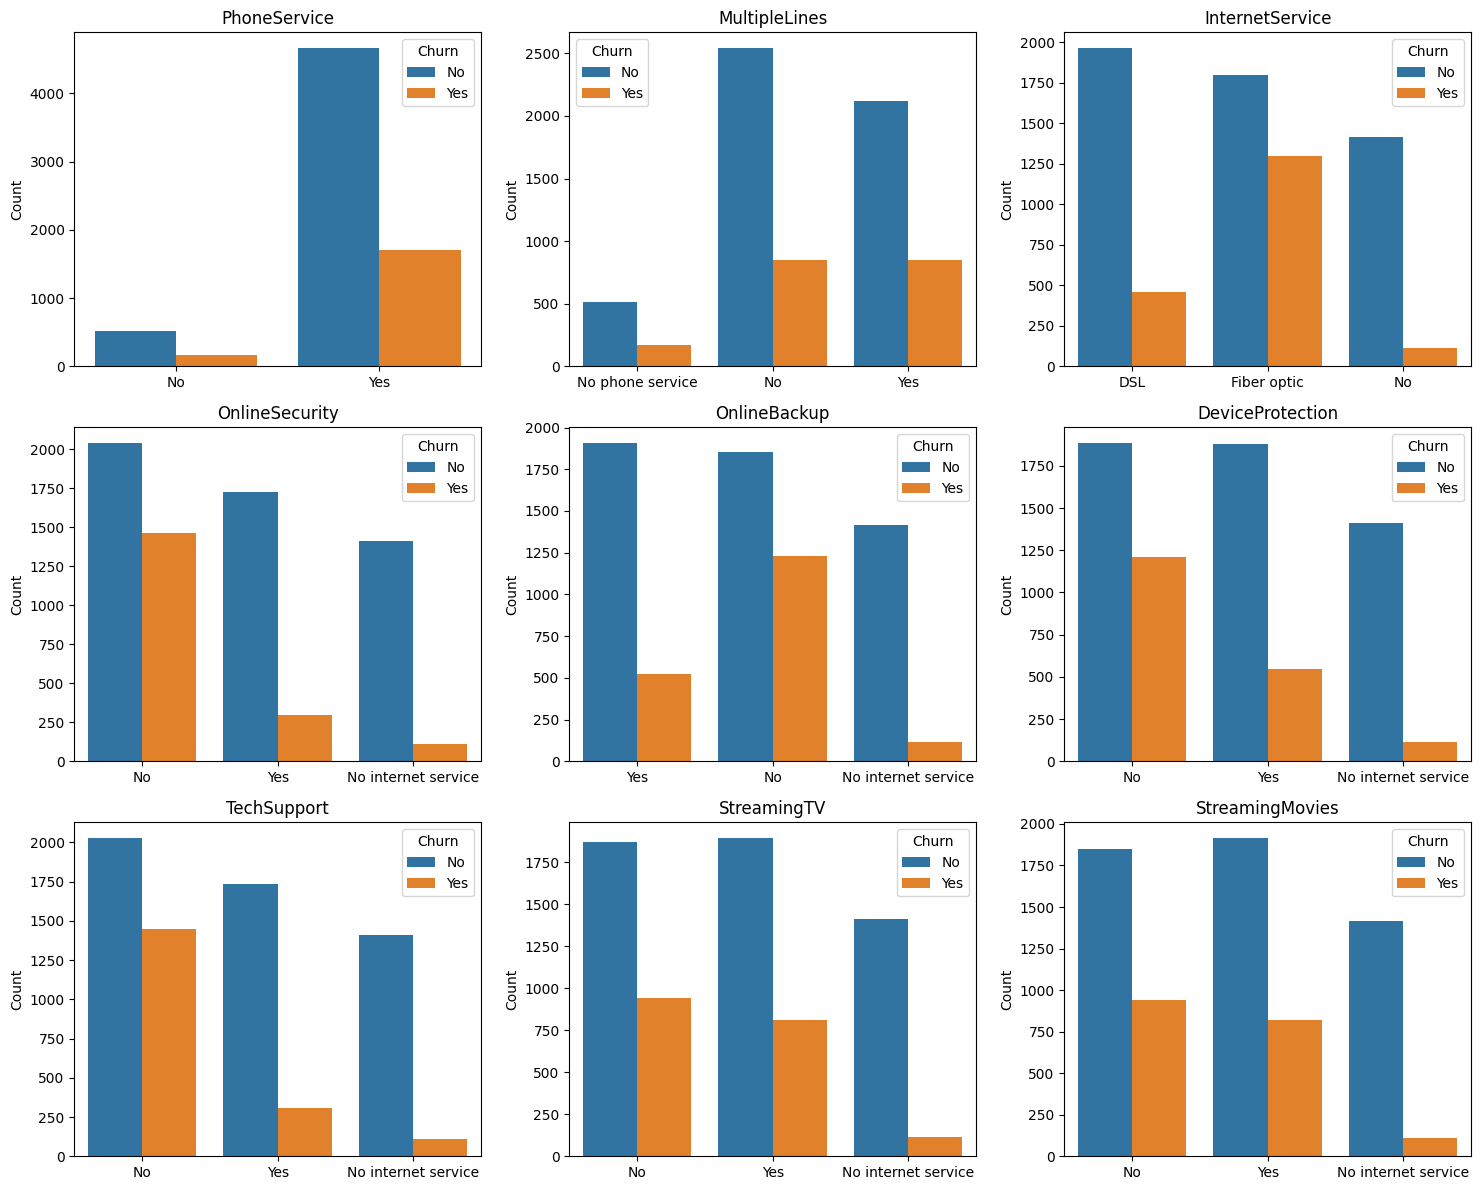

In [42]:
columns = ['PhoneService', 'MultipleLines', 'InternetService',
           'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
           'TechSupport', 'StreamingTV', 'StreamingMovies']

fig, axes = plt.subplots(3, 3, figsize=(15, 12))  # Adjust grid size

# Flatten axes array for easy iteration
axes = axes.flatten()

# Loop through columns and create countplots
for i, col in enumerate(columns):
    sns.countplot(x=df[col], ax=axes[i], hue = df["Churn"])
    axes[i].set_title(col)  # Set title for each subplot
    axes[i].set_xlabel('')  # Remove x-axis label to avoid redundancy
    axes[i].set_ylabel('Count')

plt.tight_layout()
plt.show()

<!-- The Majority of customer who do not churn tend to have services like phoneservice, internetservice(Particularly DSL), and OnlineSecurity enabled. For services like OnlineBackup, TechSuppport and StreamingTV , churn rates are noticeably higher when thses services are not used or are unavailabel  -->

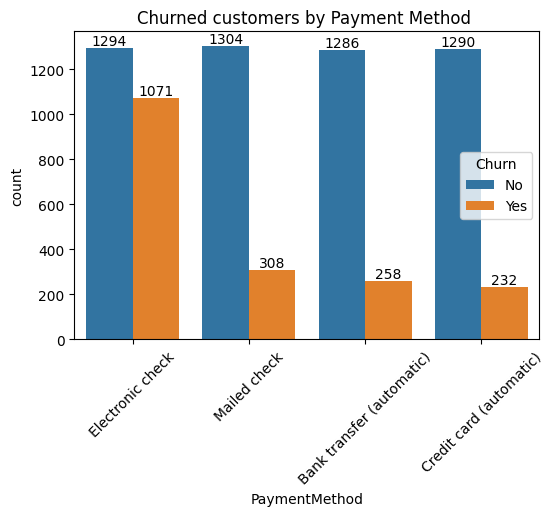

In [52]:
plt.figure(figsize = (6, 4))
ax = sns.countplot(x = "PaymentMethod", data = df, hue = "Churn")
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title("Churned customers by Payment Method ")
plt.xticks(rotation = 45)
plt.show()

In [ ]:
#Customer is likely to churn when he is  using electronic check as apayment method.